# Classification des documents du procès des groupes américains du tabac

In [1]:
# some librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import os
import re


## Les données

Pour avoir une idée sur les données qu'on a 

In [2]:
# view of the data
tabl=pd.read_csv('C:/Users/fzed/Documents/Python Scripts/nlp-labs/tobacco-lab/data/Tobacco3482.csv', sep=',')
tabl.head()

,img_path,label
0,Advertisement/0000136188.jpg,Advertisement
1,Advertisement/0000435350.jpg,Advertisement
2,Advertisement/0000556056.jpg,Advertisement
3,Advertisement/0030048095.jpg,Advertisement
4,Advertisement/0030048989.jpg,Advertisement


#### Les differents Classes qu'on a 

In [3]:
print("Classes :",np.unique(tabl.label))

Classes : ['Advertisement' 'Email' 'Form' 'Letter' 'Memo' 'News' 'Note' 'Report'
 'Resume' 'Scientific']


#### La distribution des données

Text(0.5,1,'Distribution des données')

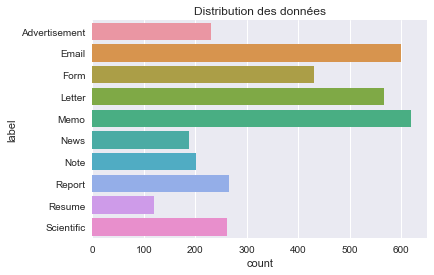

In [4]:
import seaborn as sns
%matplotlib inline
sns.set()
sn=sns.countplot(data=tabl,y=tabl.label)
sn.set_title("Distribution des données")


On remarque que la plupart des données font partie des classes:
* Emails
* Memos
* Lettres
* Form

###  Lire les données

In [5]:
# Data
path = "C:/Users/fzed/Documents/Python Scripts/nlp-labs/tobacco-lab/data/Tobacco3482-OCR"
dirs = os.listdir( path )
label=[]
Data=[]
for i,c in enumerate(dirs): 
    path_classe = path+"/"+c
    for t in os.listdir(path_classe ) :
        os.chdir( path_classe )
        label.append(i)
        Data.append(open(t,'r',encoding="utf8").read())
        
        

In [6]:
Data1=Data

### PréTraitement(Preprecessing)

Une approche simple consiste à supposer que la plus petite unité d'information dans un texte est le mot . Nous allons donc représenter nos textes sous forme de séquences de mots.


In [7]:
def clean_text(text):
    """
    Applies some pre-processing on the given text.

    Steps :
    - Removing HTML tags
    - Removing punctuation
    - Lowering text
    """
    
    # remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # remove the characters [\], ['] , ["] ,[“] and [‘]
    text = re.sub(r"\\", "", text)    
    text = re.sub(r"\'", "", text)    
    text = re.sub(r"\"", "", text)
    text = re.sub(r"\“", "", text)
    text = re.sub(r"\‘", "", text)
    
    # convert text to lowercase
    text = text.strip().lower()
    
    # replace punctuation characters with spaces
    filters='!"\'#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
    translate_dict = dict((c, " ") for c in filters)
    translate_map = str.maketrans(translate_dict)
    text = text.translate(translate_map)

    return text

#### Exemple avec la fonction clean text

In [8]:
Data[500]

"~—Original Message-—\n\nFrom: Hsu, Frank\n\nSent: ‘Thursday, October 07, 1999 3:25 PM\nTo: Skinner, lla M.; Parrish, Milton E.\nCe: Self, David A.; Callicutt, Charlene\nSubject: FW: Mainstream CO Method\n\nHi, According to D. Self's list, you are the desginated reviewers for the attached MS CO. Please\nforward your comments to Gharlene as early as possible. We need to complete this method\nlatest by Thursday (10/14). Thanks for your help.\n\nFrank\n\nVP6CP9ST8NC"

In [9]:
clean_text(Data[500])

' —original message —  from  hsu  frank  sent  thursday  october 07  1999 3 25 pm to  skinner  lla m   parrish  milton e  ce  self  david a   callicutt  charlene subject  fw  mainstream co method  hi  according to d  selfs list  you are the desginated reviewers for the attached ms co  please forward your comments to gharlene as early as possible  we need to complete this method latest by thursday  10 14   thanks for your help   frank  vp6cp9st8nc'

#### Netoyer tous les données (Train, Test..)

In [10]:
l=len(Data)
for i in range(l):
    Data[i]=clean_text(Data[i])

In [11]:
#Verification 
Data[500]

' —original message —  from  hsu  frank  sent  thursday  october 07  1999 3 25 pm to  skinner  lla m   parrish  milton e  ce  self  david a   callicutt  charlene subject  fw  mainstream co method  hi  according to d  selfs list  you are the desginated reviewers for the attached ms co  please forward your comments to gharlene as early as possible  we need to complete this method latest by thursday  10 14   thanks for your help   frank  vp6cp9st8nc'

Split Data

In [12]:
# split Data
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

X_train, X_test, y_train, y_test = train_test_split(Data, tabl.label, test_size=0.2)

X_dev,X_test,y_dev,y_test=train_test_split(X_test, y_test, test_size=0.5)

# Partie Classification

## 1.Classifieur bayésien naif

### bag of words representation

In [13]:
## Bag-of-word representation
vectorizer = CountVectorizer()
vectorizer.fit(Data)
X_train_counts = vectorizer.transform(X_train)
X_dev_counts=vectorizer.transform(X_dev)

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train_counts, y_train)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# YOUR CODE HERE
print("=====================Bag-of-word representation=====================")
print("classification_report : \n",classification_report(y_dev, clf.predict(X_dev_counts)))
print("==========================================================")
print("confusion_matrix : \n",confusion_matrix(y_dev, clf.predict(X_dev_counts)))


=====================Bag-of-word representation=====================
classification_report : 
                precision    recall  f1-score   support

Advertisement       0.71      0.19      0.29        27
        Email       0.93      0.82      0.87        62
         Form       0.63      0.67      0.65        46
       Letter       0.48      0.84      0.62        38
         Memo       0.53      0.83      0.64        63
         News       0.64      0.86      0.73        21
         Note       0.00      0.00      0.00        18
       Report       1.00      0.10      0.18        31
       Resume       1.00      1.00      1.00        15
   Scientific       0.69      0.67      0.68        27

  avg / total       0.68      0.65      0.60       348

confusion_matrix : 
 [[ 5  0  3  6  6  7  0  0  0  0]
 [ 0 51  1  2  8  0  0  0  0  0]
 [ 0  0 31  4  9  1  0  0  0  1]
 [ 0  0  0 32  6  0  0  0  0  0]
 [ 0  0  1  8 52  0  0  0  0  2]
 [ 1  1  0  0  0 18  0  0  0  1]
 [ 1  3  8  1  4  1  0 

C:\Users\fzed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Vecteurs Tf-IDF comme caracteristique

1. Word Level TF-IDF : MAtrice representant les scores tf-idf de chaque terme dans les differents documents.
2. N-gram Level TF-IDF : N-grams est la combinaison de N termes . Et cette MAtrice represente les scores tf-idf de N_grams

In [14]:
# word level TF/IDF
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
# YOUR CODE HERE
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
# tf_transformer = TfidfTransformer().fit(Data)
tfidf_vect.fit(Data)
X_train_tf = tfidf_vect.transform(X_train)
X_dev_tf = tfidf_vect.transform(X_dev)
# model training 
clf_tf = MultinomialNB()
clf_tf.fit(X_train_tf, y_train)
#
# print("le score sur les données de validation",clf.score(X_dev_tf, y_dev))
#
print("===================== word level TF/IDF =====================")
print("classification_report : \n",classification_report(y_dev, clf_tf.predict(X_dev_tf)))
print("==========================================================")
print("confusion_matrix : \n",confusion_matrix(y_dev, clf_tf.predict(X_dev_tf)))


===================== word level TF/IDF =====================
classification_report : 
                precision    recall  f1-score   support

Advertisement       0.90      0.33      0.49        27
        Email       0.98      0.92      0.95        62
         Form       0.59      0.70      0.64        46
       Letter       0.35      0.76      0.48        38
         Memo       0.48      0.84      0.61        63
         News       1.00      0.05      0.09        21
         Note       0.00      0.00      0.00        18
       Report       1.00      0.03      0.06        31
       Resume       1.00      1.00      1.00        15
   Scientific       0.93      0.52      0.67        27

  avg / total       0.71      0.61      0.56       348

confusion_matrix : 
 [[ 9  0  7  6  5  0  0  0  0  0]
 [ 0 57  0  1  4  0  0  0  0  0]
 [ 0  0 32  2 12  0  0  0  0  0]
 [ 0  0  0 29  9  0  0  0  0  0]
 [ 0  0  1  9 53  0  0  0  0  0]
 [ 1  0  0 17  2  1  0  0  0  0]
 [ 0  1 10  0  7  0  0  0  0  

C:\Users\fzed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [15]:
#ngram level tf_idf
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(Data)
X_train_tf_ngram = tfidf_vect_ngram.transform(X_train)
X_dev_tf_ngram = tfidf_vect_ngram.transform(X_dev)
# bayes
clf_ngram = MultinomialNB()
clf_ngram.fit(X_train_tf_ngram, y_train)
#
# print("le score sur les données de validation",clf.score(X_dev_tf_ngram, y_dev))
#
print("===================== ngram level tf_idf =====================")
print("classification_report : \n",classification_report(y_dev, clf_ngram.predict(X_dev_tf_ngram)))
print("==========================================================")
print("confusion_matrix : \n",confusion_matrix(y_dev, clf_ngram.predict(X_dev_tf_ngram)))


===================== ngram level tf_idf =====================
classification_report : 
                precision    recall  f1-score   support

Advertisement       1.00      0.48      0.65        27
        Email       0.89      0.92      0.90        62
         Form       0.69      0.67      0.68        46
       Letter       0.51      0.66      0.57        38
         Memo       0.47      0.87      0.61        63
         News       0.94      0.76      0.84        21
         Note       1.00      0.17      0.29        18
       Report       0.88      0.23      0.36        31
       Resume       1.00      1.00      1.00        15
   Scientific       0.78      0.52      0.62        27

  avg / total       0.76      0.68      0.66       348

confusion_matrix : 
 [[13  2  4  3  5  0  0  0  0  0]
 [ 0 57  1  2  2  0  0  0  0  0]
 [ 0  0 31  3 11  0  0  0  0  1]
 [ 0  2  0 25 11  0  0  0  0  0]
 [ 0  1  0  7 55  0  0  0  0  0]
 [ 0  1  0  1  2 16  0  0  0  1]
 [ 0  0  2  0 13  0  3  0  0 

D'après le rapport de classification on constate que le model est plutot modeste , en analysant les resultats ,on peut remarquer des anomalie , comme par exemple  dans la classe "Report" où toutes les metriques sont égales à 0 dans les deux preières representation(Bag of words et word level tf_IDF)

### optimization des hyper parametres; 

on peut avoir de meilleur resultats , par rapport au premier model"bayesien"
,en jouent avec les hyper parametres:
    * pour le classifieur : le parametre alpha
    * max_features, max_df, min_df,ngram orders pour le TfIDF transformer
ces parametres peuvent etre optimiser en utilisant Gridsearch

In [16]:
# Hyperameters optimization with GridSearchCV = parallel processing
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from pprint import pprint
from time import time
import logging
# Display progress logs on stdout
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')


pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])


parameters = {
    'vect__max_df':(0.1, 0.5, 0.9),
    'vect__max_features':(1000, 2000, 3000),
    'clf__alpha' :(0.01,0.05,0.07,0.1,0.5,1.0)
#     'clf__ngram' :(2,3,5,7,10)
    
    
}

grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=2)

print("Performing grid search...")
print("pipeline:", [name for name, _ in pipeline.steps])
print("parameters:")
pprint(parameters)
t0 = time()
grid_search.fit(X_train, y_train)
print("done in %0.3fs" % (time() - t0))
print()

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
parameters:
{'clf__alpha': (0.01, 0.05, 0.07, 0.1, 0.5, 1.0),
 'vect__max_df': (0.1, 0.5, 0.9),
 'vect__max_features': (1000, 2000, 3000)}
Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   36.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:  2.5min finished


done in 154.734s

Best score: 0.721
Best parameters set:
	clf__alpha: 0.07
	vect__max_df: 0.5
	vect__max_features: 2000


In [17]:
best_estimator = grid_search.best_estimator_

# Affichage du rapport de classification et de la matrice de confusion
print(classification_report(y_test, best_estimator.predict(X_test)))
confusion_matrix(y_test, best_estimator.predict(X_test))

               precision    recall  f1-score   support

Advertisement       0.68      0.65      0.67        23
        Email       0.87      0.95      0.91        56
         Form       0.73      0.75      0.74        44
       Letter       0.70      0.59      0.64        68
         Memo       0.53      0.71      0.60        59
         News       0.58      0.79      0.67        14
         Note       0.50      0.26      0.34        23
       Report       0.53      0.45      0.49        20
       Resume       1.00      1.00      1.00        13
   Scientific       0.78      0.62      0.69        29

  avg / total       0.69      0.69      0.68       349



array([[15,  2,  1,  0,  3,  1,  1,  0,  0,  0],
       [ 0, 53,  1,  0,  2,  0,  0,  0,  0,  0],
       [ 2,  0, 33,  0,  2,  0,  4,  3,  0,  0],
       [ 0,  1,  1, 40, 19,  4,  0,  2,  0,  1],
       [ 1,  2,  1,  8, 42,  0,  1,  1,  0,  3],
       [ 1,  0,  1,  0,  0, 11,  0,  1,  0,  0],
       [ 1,  3,  2,  3,  7,  1,  6,  0,  0,  0],
       [ 1,  0,  2,  3,  2,  2,  0,  9,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 13,  0],
       [ 1,  0,  3,  3,  3,  0,  0,  1,  0, 18]], dtype=int64)

## 2.Classifieur : Convolutional Neural Network (CNN) 

In [18]:
import ast
import os
import nn_utils 
from keras.layers import Dense, Embedding, Input
from keras.layers import GRU, Dropout, MaxPooling1D, Conv1D, Flatten,BatchNormalization
from keras.models import Model
import numpy as np
import itertools
from keras.utils import np_utils
from sklearn.metrics import (classification_report, 
                             precision_recall_fscore_support, 
                             accuracy_score)

from keras.preprocessing import text, sequence

C:\Users\fzed\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [19]:
# Model parameters    TrainingHistory
MAX_FEATURES =1000 
MAX_TEXT_LENGTH =1000 
EMBED_SIZE  =100 
BATCH_SIZE = 32
EPOCHS = 10
VALIDATION_SPLIT = 0.1

In [20]:
def get_train_test(train_raw_text, test_raw_text,dev_raw_text):
    
    tokenizer = text.Tokenizer(num_words=MAX_FEATURES)

    tokenizer.fit_on_texts(list(train_raw_text))
    dev_tokenized = tokenizer.texts_to_sequences(dev_raw_text)
    train_tokenized = tokenizer.texts_to_sequences(train_raw_text)
    test_tokenized = tokenizer.texts_to_sequences(test_raw_text)
    return (sequence.pad_sequences(train_tokenized, maxlen=MAX_TEXT_LENGTH), 
           sequence.pad_sequences(test_tokenized, maxlen=MAX_TEXT_LENGTH),
           sequence.pad_sequences(dev_tokenized, maxlen=MAX_TEXT_LENGTH))



def get_model():

    inp = Input(shape=(MAX_TEXT_LENGTH,))
    model = Embedding(MAX_TEXT_LENGTH, EMBED_SIZE)(inp)
    model = Dropout(0.2)(model)
   
    
    model = Conv1D(filters=128, kernel_size=5, padding='same', activation='relu')(model)
    model = MaxPooling1D(pool_size=3)(model)
    model = BatchNormalization(axis=1)(model)
    model = Dropout(0.3)(model)
    
    model = Flatten()(model)
    model = Dense(10, activation="softmax")(model)
    model = Model(inputs=inp, outputs=model)
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model





# Get the list of different classes
CLASSES_LIST = np.unique(y_train)
n_out = len(CLASSES_LIST)
print(CLASSES_LIST)

# Convert clas string to index
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(CLASSES_LIST)
y_train_t = le.transform(y_train) 
y_dev_t=le.transform(y_dev) 
y_test_t = le.transform(y_test) 
train_y_cat = np_utils.to_categorical(y_train_t, n_out)
dev_y_cat = np_utils.to_categorical(y_dev_t, n_out)
test_y_cat = np_utils.to_categorical(y_test_t, n_out)

# get the textual data in the correct format for NN
x_vec_train, x_vec_test,x_vec_dev = get_train_test(X_train, X_test,X_dev)
# print(len(x_vec_train), len(x_vec_test))

# define the NN topology
model = get_model()

# Define training procedure
# history = TrainingHistory(x_vec_test, y_test, CLASSES_LIST)
model.fit(x_vec_train, train_y_cat,
              batch_size=BATCH_SIZE,
              epochs=EPOCHS, verbose=1,
               validation_data=(x_vec_dev,dev_y_cat)
         )


['Advertisement' 'Email' 'Form' 'Letter' 'Memo' 'News' 'Note' 'Report'
 'Resume' 'Scientific']
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1000)              0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 1000, 100)         100000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000, 100)         0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1000, 128)         64128     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 333, 128)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 333, 128)          1332      
_______________________________________________

In [21]:
# transformer les prediction du model en fonction des classes 
y_predicted=model.predict(x_vec_test)
y_predicted.shape
y_pred=[]
for i in range(y_predicted.shape[0]):
    maxi=0
    maxi= np.argmax(y_predicted[i])
    y_pred.append(CLASSES_LIST[maxi])
    

In [22]:
print("Test Accuracy:", accuracy_score(y_test, y_pred))

p, r, f1, s = precision_recall_fscore_support(y_test, y_pred, 
                                              average='micro',
                                              labels=[x for x in 
                                                      np.unique(y_train) 
                                                      if x not in ['CSDECMOTV']])

print('p r f1 %.1f %.2f %.3f' % (np.average(p, weights=s)*100.0, 
                                 np.average(r, weights=s)*100.0, 
                                 np.average(f1, weights=s)*100.0))


print(classification_report(y_test, y_pred, labels=[x for x in 
                                                       np.unique(y_train) 
                                                       if x not in ['CSDECMOTV']]))

print("confusion_matrix : \n",confusion_matrix(y_test,y_pred))

Test Accuracy: 0.7134670487106017
p r f1 71.3 71.35 71.347
               precision    recall  f1-score   support

Advertisement       0.52      0.48      0.50        23
        Email       0.92      0.96      0.94        56
         Form       0.69      0.77      0.73        44
       Letter       0.78      0.66      0.71        68
         Memo       0.72      0.75      0.73        59
         News       0.70      0.50      0.58        14
         Note       0.62      0.70      0.65        23
       Report       0.24      0.30      0.27        20
       Resume       1.00      1.00      1.00        13
   Scientific       0.70      0.66      0.68        29

  avg / total       0.72      0.71      0.71       349

confusion_matrix : 
 [[11  1  3  0  1  0  5  2  0  0]
 [ 0 54  0  0  2  0  0  0  0  0]
 [ 2  2 34  1  0  0  3  1  0  1]
 [ 2  2  2 45  9  0  0  8  0  0]
 [ 0  0  0  7 44  1  1  3  0  3]
 [ 1  0  1  0  1  7  0  3  0  1]
 [ 2  0  3  0  2  0 16  0  0  0]
 [ 3  0  3  4  0  1  0  6 

## 3. Multi Layer Perceptron (MLP)

In [23]:
from sklearn.neural_network import MLPClassifier

model_mlp = MLPClassifier(alpha = 1.2, early_stopping=True, batch_size=50, verbose=1)
model_mlp.fit(X_train_counts, y_train)

Iteration 1, loss = 2.04635497
Validation score: 0.749104
Iteration 2, loss = 1.14282390
Validation score: 0.806452
Iteration 3, loss = 1.03219721
Validation score: 0.799283
Iteration 4, loss = 1.00411970
Validation score: 0.784946
Iteration 5, loss = 0.98185861
Validation score: 0.792115
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.


MLPClassifier(activation='relu', alpha=1.2, batch_size=50, beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=1, warm_start=False)

In [24]:
print("===================== MLP  =====================")
print("classification_report : \n",classification_report(y_dev, model_mlp.predict(X_dev_counts)))
print("==========================================================")
print("confusion_matrix : \n",confusion_matrix(y_dev,model_mlp.predict(X_dev_counts)))


===================== MLP  =====================
classification_report : 
                precision    recall  f1-score   support

Advertisement       0.83      0.56      0.67        27
        Email       0.91      0.97      0.94        62
         Form       0.76      0.96      0.85        46
       Letter       0.57      0.76      0.65        38
         Memo       0.87      0.92      0.89        63
         News       0.86      0.86      0.86        21
         Note       0.71      0.56      0.63        18
       Report       0.78      0.45      0.57        31
       Resume       1.00      1.00      1.00        15
   Scientific       0.80      0.59      0.68        27

  avg / total       0.81      0.80      0.79       348

confusion_matrix : 
 [[15  1  3  4  0  0  3  0  0  1]
 [ 1 60  0  1  0  0  0  0  0  0]
 [ 0  0 44  1  0  0  1  0  0  0]
 [ 0  0  1 29  7  0  0  1  0  0]
 [ 0  1  0  3 58  0  0  0  0  1]
 [ 1  1  0  0  0 18  0  1  0  0]
 [ 0  3  4  1  0  0 10  0  0  0]
 [ 1  0  2

On peut toujours ameliorer les models , en jouent sur plusieurs parametres afin d'avoir de meilleurs resultats:

    *batch_size
    *nombre d'epochs
    *alpha (MLP)
